In [1]:
import numpy as np
import pandas as pd
import re

In [199]:
question_master_intent_artist = np.array([
'- who sang [song name](song_name) in [year](year)',
'- who sang [song name](song_name)',
'- who sings [song name](song_name) in [year](year)',
'- who sings [song name](song_name)',
'- who was the singer who sang [song name](song_name) in [year](year)',
'- who was the singer that sang [song name](song_name) in [year](year)',
'- who was the artist who sang [song name](song_name) in [year](year)',
'- who was the artist that sang [song name](song_name) in [year](year)',
'- what is the name of the singer that sang [song name](song_name) in [year](year)',
'- what is the name of the singer who sings [song name](song_name) in [year](year)',
'- what is the name of the artist that sings [song name](song_name) in [year](year)',
'- what is the name of the artist who sang [song name](song_name) in [year](year)',
'- What is the artist that sang [song name](song_name) in [year](year) called',
'- What is the singer that sings [song name](song_name) in [year](year) called',
'- who was the guy that sings [song name](song_name) in [year](year)',
'- who was the guy that sang [song name](song_name) in [year](year)',
'- who was the girl that sings [song name](song_name) in [year](year)',
'- who was the girl that sang [song name](song_name) in [year](year)',
'- who was the band that sang [song name](song_name) in [year](year)',
'- what is the artist of the song [song name](song_name) in [year](year)',
'- what musician played this song [song name](song_name) in [year](year)',
'- which band played [song name](song_name) in [year](year)',
'- who is that song [song name](song_name) in [year](year) by',
'- who released the song [song name](song_name) in [year](year)',
'- which singer sang [song name](song_name)',
'- which singer sang [song name](song_name) in [year](year)',
'- which artist sang [song name](song_name)',
'- which artist sang [song name](song_name) in [year](year)',
])

In [200]:
question_master_intent_year = np.array([
'- What year did [song name](song_name) come out',
'- What year did [song name](song_name) by [artist](artist) come out',
'- What year was [song name](song_name) on the billboard',
'- What year was [song name](song_name) by [artist](artist) on the billboard',
'- What year did [artist](artist) release [song name](song_name)',
'- What year was [song name](song_name) released',
'- What year was [song name](song_name) by [artist](artist) released',    
'- When was [song name](song_name) by [artist](artist) released',
'- When was [song name](song_name) released',
'- When did [song name](song_name) by [artist](artist) get released',
'- When did [song name](song_name) by [artist](artist) hit the charts',
'- When did [song name](song_name) hit the charts',
'- what year did [song name](song_name) by [artist](artist) get released',
'- what year was [song name](song_name) by [artist](artist)',
'- what year was [song name](song_name)',
'- how long ago was [song name](song_name) by [artist](artist)',
'- how long ago was [song name](song_name)',
'- when did [song name](song_name) by [artist](artist) come out',
'- when did [song name](song_name) come out',
'- how old was [song name](song_name) by [artist](artist)',
'- how old was [song name](song_name)',
'- Which year did [song name](song_name) come out',
'- Which year did [song name](song_name) by [artist](artist) come out',
'- Which year was [song name](song_name) on the billboard',
'- Which year was [song name](song_name) by [artist](artist) on the billboard',
'- Which year did [artist](artist) release [song name](song_name)',
'- Which year was [song name](song_name) released',
'- Which year was [song name](song_name) by [artist](artist) released',    
])

In [201]:
question_master_intent_rank = np.array([
'- where did [song name](song_name) by [artist](artist) rank on the billboard charts',
'- what was the ranking of the song [song name](song_name) by [artist](artist) during [year](year)',
'- what was [song name](song_name)  by [artist](artist) ranking in [year](year)',
'- what spot in the billboard chart did [song name](song_name) by [artist](artist) end up',    
'- what was [song name](song_name) by [artist](artist) rank',
'- how did [song name](song_name) by [artist](artist) do on the billboard',
'- how did [song name](song_name) by [artist](artist) do on the billboard in [year](year)',    
'- what is the billboard ranking of the song [song name](song_name) by [artist](artist)',
])

In [202]:
question_master_intent_lyrics = np.array([
'- What are the lyrics for [song name](song_name) by [artist](artist)',
'- What are the lyrics in [song name](song_name)',
'- What is the lyrics for [song name](song_name) by [artist](artist)',
'- What is the lyrics in [song name](song_name)',
'- can you give me the lyrics for [song name](song_name) by [artist](artist)',    
'- can you give me the lyrics of [song name](song_name)',
'- can you show me the lyrics for [song name](song_name) by [artist](artist)',
'- can you show me the lyrics of [song name](song_name)',
'- give me the lyrics of [song name](song_name) by [artist](artist)',    
'- give me the lyrics for [song name](song_name)',
'- show me the lyrics of [song name](song_name) by [artist](artist)',    
'- show me the lyrics for [song name](song_name)',  
'- can you display the lyrics of [song name](song_name)',
'- can you return the lyrics of [song name](song_name)',
])

In [203]:
df = pd.read_csv('billboard_2000s.csv',encoding = "latin" )
df.head()

,Rank,Song,Artist,Year,Lyrics
0,1,breathe,faith hill,2000,i can feel the magic floating in the air bein...
1,2,smooth,santana featuring rob thomas,2000,man its a hot one like seven inches from the ...
2,3,maria maria,santana featuring the product gb,2000,ladies and gents turn up your sound systems t...
3,4,i wanna know,joe,2000,yeah oh yeah alright oh oh ohits amazing how ...
4,5,everything you want,vertical horizon,2000,somewhere theres speaking its already coming ...


In [204]:
def fill_clean(random_question,random_song,random_year,random_artist):
    
    random_question = re.sub("\[song name\]",random_song,random_question)
    random_question = re.sub("\[year\]",random_year,random_question)
    random_question = re.sub("\[artist\]",random_artist,random_question)
    
    random_question = re.sub("\(song_name\)"," ",random_question)
    random_question = re.sub("\(year\)"," ",random_question)
    random_question = re.sub("\(artist\)"," ",random_question)

    random_question = re.sub('\W'," ",random_question)
    random_question = re.sub('\s+', ' ', random_question)

    random_question = random_question.strip(' ')

    return random_question

In [216]:
intents = ['artist','year','ranking','lyrics']
dict_test = {}
count = 0

while len(dict_test) < 1000:

    random_intent = np.random.choice(intents,replace=True)
    random_song = np.random.choice(df.Song,replace=False)
    random_year = str(df.Year[df.Song == random_song].values[0])
    random_artist = str(df.Artist[df.Song == random_song].values[0])
    
    if random_intent == 'artist':
        
        random_question = np.random.choice(question_master_intent_artist,replace=True)
        random_question = fill_clean(random_question,random_song,random_year,random_artist)
        
        dict_test[random_question]=random_intent
               
    elif random_intent == 'year':
        
        random_question = np.random.choice(question_master_intent_year,replace=True)
        random_question = fill_clean(random_question,random_song,random_year,random_artist)
            
        dict_test[random_question]=random_intent
           
    elif random_intent == 'ranking':
        
        random_question = np.random.choice(question_master_intent_rank,replace=True)
        random_question = fill_clean(random_question,random_song,random_year,random_artist)
        
        dict_test[random_question]=random_intent
        
    elif random_intent == 'lyrics':
        
        random_question = np.random.choice(question_master_intent_lyrics,replace=True)
        random_question = fill_clean(random_question,random_song,random_year,random_artist)

        dict_test[random_question]=random_intent
        

In [221]:
from sklearn.feature_extraction.text import CountVectorizer
from rasa_nlu.training_data import load_data
from rasa_nlu.config import RasaNLUModelConfig
from rasa_nlu.model import Trainer
from rasa_nlu import config as rasa_config
from rasa_nlu.model import Metadata, Interpreter

import json
import numpy as np
import pandas as pd
import re

from IPython.display import Markdown, display
from IPython.display import clear_output

def printmd(string):
    display(Markdown(string))

In [277]:
df_test = pd.DataFrame.from_dict(dict_test, orient='index',columns=['True_Label'])
df_test = df_test.reset_index()
df_test.head()

,index,True_Label
0,what is the name of the artist who sang here w...,artist
1,What are the lyrics in sugar were goin down,lyrics
2,What are the lyrics in i need you,lyrics
3,where did beautiful by christina aguilera rank...,ranking
4,who is that song same girl in 2007 by,artist


In [223]:
interpreter = Interpreter.load('./models/nlu/default/current')

In [325]:
pred_list = []
pred_correct = []

for num in range(1000):
    pred_int_ent = interpreter.parse(df_test.iloc[num].values[0])
    pred_list.append(pred_int_ent['intent']['name'])
    
    if df_test.iloc[num].values[1] == pred_int_ent['intent']['name']:
        pred_correct.append(1)
    else:
        pred_correct.append(0)
        
df_test['Pred_Label'] = pred_list
df_test['Pred_Correct'] = pred_correct

df_test.to_excel("df_test.xlsx")

In [281]:
accuracy = (df_test['Pred_Correct'].sum(axis=0))/10
print(f'Accuracy = {accuracy}%')

Accuracy = 96.6%


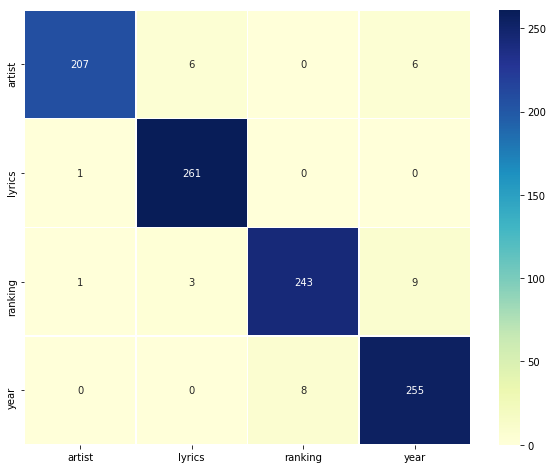

In [324]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cf = confusion_matrix(df_test.True_Label, df_test.Pred_Label)

labels=['artist','lyrics','ranking','year']
plt.rcParams["figure.figsize"] = [10,8]                       
sns.heatmap(cf,linewidths=.5, annot=True, fmt="d", cmap="YlGnBu",xticklabels=labels, yticklabels=labels)
plt.show()

In [308]:
df_fail = df_test[df_test['Pred_Correct']==0].sort_values(by=['True_Label'])
df_fail

,index,True_Label,Pred_Label,Pred_Correct
447,What is the singer that sings if today was you...,artist,year,0
424,who sings these words in 2005,artist,lyrics,0
417,who was the girl that sings my humps in 2005,artist,lyrics,0
567,who is that song butterflies in 2002 by,artist,lyrics,0
373,What is the singer that sings the next episode...,artist,lyrics,0
315,What is the singer that sings are you gonna be...,artist,lyrics,0
475,who was the girl that sings good girls go bad ...,artist,year,0
579,who released the song danger been so long in 2001,artist,year,0
234,which artist sang if youre gone,artist,year,0
227,who is that song if youre not the one in 2003 by,artist,lyrics,0
